In [67]:
import pandas as pd
#read ufo.csv file into data frame
df = pd.read_excel("pre.xlsx")
df.head()

,F,M,R,attribute_set_name,city,created_at_month,created_at_year,customer_email,customer_id,customer_level,customer_name,customer_value,transacttion_value,province,t_created_at_year,t_created_at_month,t_created_at_day,t_created_at_time
0,1,75.48,3,Swallow Nest;Specialty Foods,Jersey City,7,2019,yingzhu0711@gmail.com,35460,New Member,Ying Zhu,159.88872,75.48,New Jersey,2019,7,26,12
1,1,41.91,3,Chinese Herbal Medicine;Specialty Foods,HERSHEY,7,2019,870064478@qq.com,35458,New Member,Hui Zeng,145.15149,41.91,Pennsylvania,2019,7,26,12
2,1,62.90,3,Packed Medicine,Lancaster,7,2019,desiraekwong@gmail.com,35457,New Member,desirae kuang,154.36610,62.90,California,2019,7,26,11
3,1,51.60,3,Specialty Foods;Chinese Herbal Medicine,Chandler,7,2019,grapeade28@yahoo.com,35455,New Member,CAROL zhang,149.40540,51.60,Arizona,2019,7,26,11
4,1,103.20,3,Ginseng,Huntsville,7,2019,lz0006@uah.edu,35451,New Member,Liqian Zhang,172.05780,103.20,Alabama,2019,7,26,6


In [68]:
df = df.dropna()

In [69]:
df.isnull().sum()

F                     0
M                     0
R                     0
attribute_set_name    0
city                  0
created_at_month      0
created_at_year       0
customer_email        0
customer_id           0
customer_level        0
customer_name         0
customer_value        0
transacttion_value    0
province              0
t_created_at_year     0
t_created_at_month    0
t_created_at_day      0
t_created_at_time     0
dtype: int64

In [70]:
df.shape

(19910, 18)

In [71]:
df = df.drop(['customer_email', 'customer_id','customer_name','city','customer_level','transacttion_value'], axis = 1)

In [72]:
def classifcation(df):
  if 'Ginseng' in df['attribute_set_name']:
    return 1
  else:
    return 0

df['Ginseng'] = df.apply(classifcation, axis=1)

In [73]:
target_count = df.Ginseng.value_counts()
print('Class 0: {}'.format(target_count[0]))
print('Class 1: {}'.format(target_count[1]))
print('Proportion: {}'.format(round(target_count[0] / target_count[1]), 2), ': 1.0')

Class 0: 14235
Class 1: 5675
Proportion: 3.0 : 1.0


In [74]:
from sklearn.utils import resample
df_majority = df[df.Ginseng==0]
df_minority = df[df.Ginseng==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=14235,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Ginseng.value_counts()

1    14235
0    14235
Name: Ginseng, dtype: int64

In [75]:
import numpy as np
labels = df_upsampled['Ginseng']
features= df_upsampled.drop(['attribute_set_name','Ginseng'],axis =1)

In [76]:
features = pd.get_dummies(features)
print(features.head())

   F       M  R  created_at_month  created_at_year  customer_value  \
0  1   75.48  3                 7             2019       159.88872   
1  1   41.91  3                 7             2019       145.15149   
2  1   62.90  3                 7             2019       154.36610   
3  1   51.60  3                 7             2019       149.40540   
5  1  141.37  4                 7             2019       188.59343   

   t_created_at_year  t_created_at_month  t_created_at_day  t_created_at_time  \
0               2019                   7                26                 12   
1               2019                   7                26                 12   
2               2019                   7                26                 11   
3               2019                   7                26                 11   
5               2019                   7                25                 22   

   ...  province_浙江  province_海南  province_湖北  province_湖南  province_甘肃  \
0  ...           

In [77]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.30, random_state=42)

In [78]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# SVM

Accuracy: 0.8599
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4251
           1       0.87      0.85      0.86      4290

   micro avg       0.86      0.86      0.86      8541
   macro avg       0.86      0.86      0.86      8541
weighted avg       0.86      0.86      0.86      8541



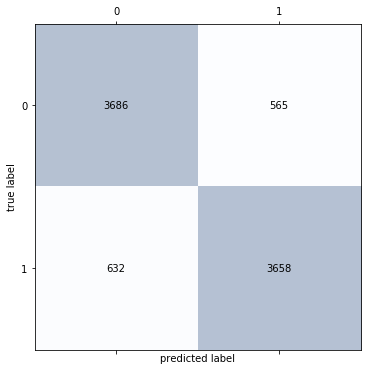

In [13]:
from sklearn import svm

SVM = svm.SVC(random_state=42)
SVM.fit(train_features, train_labels)

y_pred = SVM.predict(test_features)
 
accuracy = accuracy_score(test_labels, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

print(classification_report(test_labels, y_pred))

cm = confusion_matrix(y_true = test_labels, y_pred = y_pred)
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVM, features, labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80 (+/- 0.03)


# Logistic Regression

Accuracy: 0.6339
              precision    recall  f1-score   support

           0       0.61      0.73      0.66      4251
           1       0.67      0.54      0.60      4290

   micro avg       0.63      0.63      0.63      8541
   macro avg       0.64      0.63      0.63      8541
weighted avg       0.64      0.63      0.63      8541



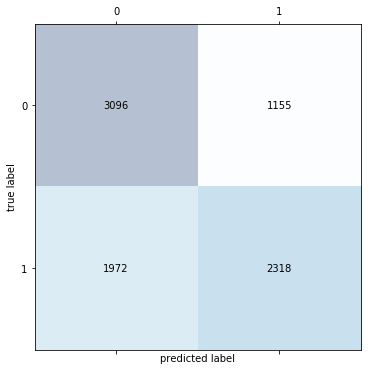

In [54]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 42)
lr.fit(train_features, train_labels)

y_pred = lr.predict(test_features)
 
accuracy = accuracy_score(test_labels, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

print(classification_report(test_labels, y_pred))

cm = confusion_matrix(y_true = test_labels, y_pred = y_pred)
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

# KNN

Accuracy: 0.7508
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      4251
           1       0.73      0.81      0.77      4290

   micro avg       0.75      0.75      0.75      8541
   macro avg       0.75      0.75      0.75      8541
weighted avg       0.75      0.75      0.75      8541

              precision    recall  f1-score   support

           0       0.78      0.69      0.73      4251
           1       0.73      0.81      0.77      4290

   micro avg       0.75      0.75      0.75      8541
   macro avg       0.75      0.75      0.75      8541
weighted avg       0.75      0.75      0.75      8541



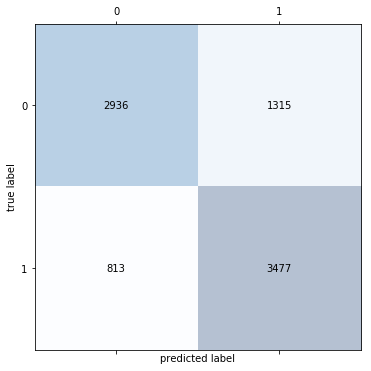

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, train_labels)

y_pred = knn.predict(test_features)
 
accuracy = accuracy_score(test_labels, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

print(classification_report(test_labels, y_pred))

print(classification_report(test_labels, y_pred))

cm = confusion_matrix(y_true = test_labels, y_pred = y_pred)
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

# Naive Bayes

Accuracy: 0.5676
              precision    recall  f1-score   support

           0       0.54      0.98      0.69      4251
           1       0.89      0.16      0.27      4290

   micro avg       0.57      0.57      0.57      8541
   macro avg       0.71      0.57      0.48      8541
weighted avg       0.71      0.57      0.48      8541



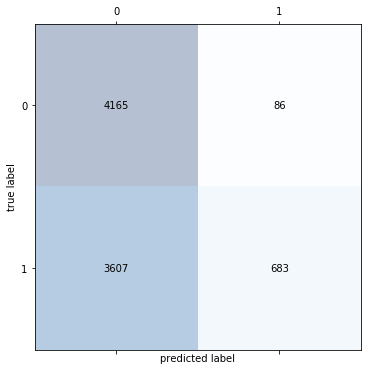

In [56]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(train_features, train_labels)

y_pred = NB.predict(test_features)
 
accuracy = accuracy_score(test_labels, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

print(classification_report(test_labels, y_pred))

cm = confusion_matrix(y_true = test_labels, y_pred = y_pred)
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

# AdaBoost

Accuracy: 0.6627
              precision    recall  f1-score   support

           0       0.64      0.73      0.68      4251
           1       0.69      0.60      0.64      4290

   micro avg       0.66      0.66      0.66      8541
   macro avg       0.67      0.66      0.66      8541
weighted avg       0.67      0.66      0.66      8541



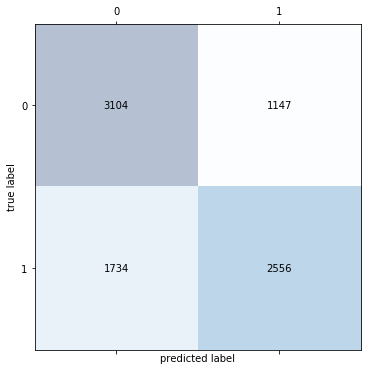

In [57]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# instantiate a Decision Tree
dt = DecisionTreeClassifier(max_depth = 2, random_state=42)

# instantate and fit an AdaBoost Classifier
adb_clf = AdaBoostClassifier(base_estimator = dt, n_estimators = 5, random_state = 42)
adb_clf.fit(train_features, train_labels)

# make predictions on the test set
y_pred = adb_clf.predict(test_features)
 
accuracy = accuracy_score(test_labels, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

print(classification_report(test_labels, y_pred))

cm = confusion_matrix(y_true = test_labels, y_pred = y_pred)
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

# Random Forest

Accuracy: 0.9018
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      4251
           1       0.88      0.93      0.91      4290

   micro avg       0.90      0.90      0.90      8541
   macro avg       0.90      0.90      0.90      8541
weighted avg       0.90      0.90      0.90      8541



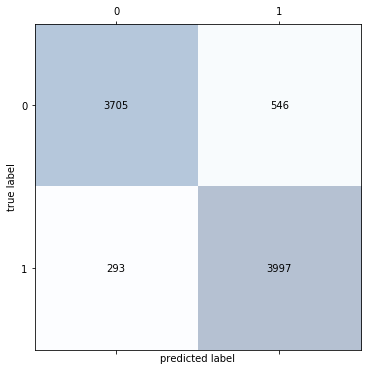

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state=42)
rf.fit(train_features, train_labels)

y_pred = rf.predict(test_features)

accuracy = accuracy_score(test_labels, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

print(classification_report(test_labels, y_pred))

cm = confusion_matrix(y_true = test_labels, y_pred = y_pred)
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

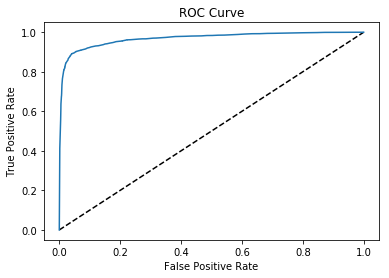

In [82]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = rf.predict_proba(test_features)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = rf.predict_proba(test_features)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(test_labels, y_pred_prob)))

AUC: 0.9685768164243816


In [86]:
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(rf, features, labels, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(np.mean(cv_auc)))

AUC scores computed using 5-fold cross-validation: 0.7608599516693113


# Features Selection

In [87]:
feature_list = list(features.columns)
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: M                    Importance: 0.17
Variable: customer_value       Importance: 0.13
Variable: R                    Importance: 0.12
Variable: t_created_at_day     Importance: 0.09
Variable: t_created_at_time    Importance: 0.08
Variable: F                    Importance: 0.07
Variable: t_created_at_month   Importance: 0.06
Variable: created_at_month     Importance: 0.05
Variable: created_at_year      Importance: 0.04
Variable: t_created_at_year    Importance: 0.01
Variable: province_California  Importance: 0.01
Variable: province_Florida     Importance: 0.01
Variable: province_Massachusetts Importance: 0.01
Variable: province_New Jersey  Importance: 0.01
Variable: province_New York    Importance: 0.01
Variable: province_Texas       Importance: 0.01
Variable: province_Virginia    Importance: 0.01
Variable: province_Washington  Importance: 0.01
Variable: province_上海          Importance: 0.01
Variable: province_广东          Importance: 0.01
Variable: province_Alabama     Importa

In [88]:
features= features[['M','customer_value','R','t_created_at_day','t_created_at_time','F','t_created_at_month']]

In [89]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.30,random_state=42)

Accuracy: 0.8832
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      4251
           1       0.85      0.93      0.89      4290

   micro avg       0.88      0.88      0.88      8541
   macro avg       0.89      0.88      0.88      8541
weighted avg       0.89      0.88      0.88      8541



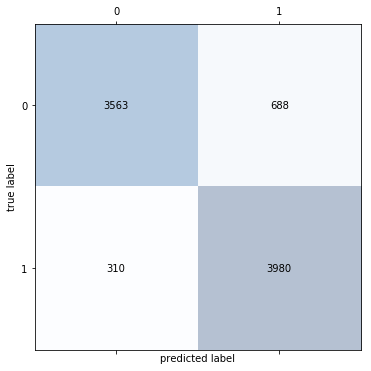

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state=42)
rf.fit(train_features, train_labels)

y_pred = rf.predict(test_features)

accuracy = accuracy_score(test_labels, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

print(classification_report(test_labels, y_pred))

cm = confusion_matrix(y_true = test_labels, y_pred = y_pred)
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

In [91]:
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(rf, features, labels, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(np.mean(cv_auc)))

AUC scores computed using 5-fold cross-validation: 0.931059728139567


# Random Forest Tuning

In [92]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [93]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(train_features, train_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 31.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [94]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [95]:
rf_random.best_score_

0.8715941592653922

In [99]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [50, 60, 70, 80, 90],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5],
    'n_estimators': [600, 800, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(train_features, train_labels)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 35.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [False], 'max_depth': [50, 60, 70, 80, 90], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [600, 800, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [100]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [101]:
grid_search.best_score_

0.872246474986201

Accuracy: 0.8722
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      4251
           1       0.88      0.92      0.90      4290

   micro avg       0.89      0.89      0.89      8541
   macro avg       0.90      0.89      0.89      8541
weighted avg       0.90      0.89      0.89      8541



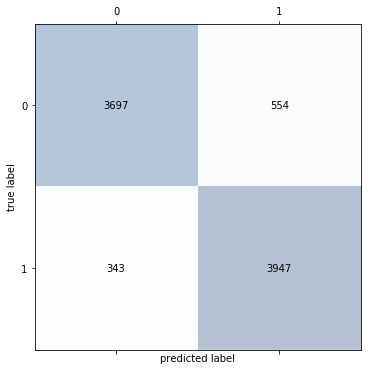

In [102]:
rf_b = RandomForestClassifier(n_estimators = 1000, bootstrap= False, max_depth = 80, max_features ='sqrt', min_samples_leaf = 1,
                              min_samples_split = 2, random_state=42)
rf_b.fit(train_features, train_labels)

y_pred = rf_b.predict(test_features)

accuracy = grid_search.best_score_
print('Accuracy: {:.4f}'.format(accuracy))

print(classification_report(test_labels, y_pred))

cm = confusion_matrix(y_true = test_labels, y_pred = y_pred)
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

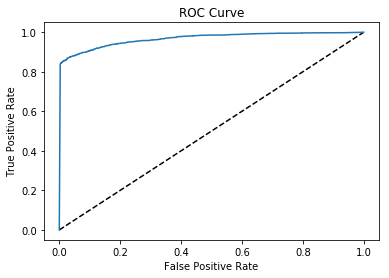

In [106]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = rf_b.predict_proba(test_features)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [108]:
y_pred_prob = rf_b.predict_proba(test_features)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(test_labels, y_pred_prob)))

AUC: 0.9670509448208812


In [104]:
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(rf_b, features, labels, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(np.mean(cv_auc)))

AUC scores computed using 5-fold cross-validation: 0.9546729103984759
